In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [2]:
truth_embeddings = pd.read_parquet("embedding_ground_truth.parquet")
truth_embeddings.rename({"id": "question_id"}, axis=1, inplace=True)
truth_embeddings.dropna(inplace=True)

In [3]:
lyre_embeddings = pd.read_parquet("lyre_embeddings.parquet")
lyre_embeddings.rename({"embedding": "lyre_embedding"}, axis=1, inplace=True)
lyre_embeddings

,question_id,lyre_embedding
0,0,"[-0.012194225564599037, -0.016077447682619095,..."
1,1,"[-0.009294695220887661, -0.019476410001516342,..."
2,2,"[-0.0009704605909064412, -0.012438801117241383..."
3,3,"[-0.0020945670548826456, 0.004990960471332073,..."
4,4,"[0.010295847430825233, -0.028891343623399734, ..."
...,...,...
676,676,"[-0.0371226966381073, -0.0061453115195035934, ..."
677,677,"[-0.02040995843708515, -0.018904084339737892, ..."
678,678,"[-0.006213430780917406, -0.017142269760370255,..."
679,679,"[-0.011124933138489723, -0.011484422720968723,..."


In [4]:
llama_embeddings = pd.read_parquet("llama_embeddings.parquet")
llama_embeddings.rename({"embedding": "llama_embedding"}, axis=1, inplace=True)
llama_embeddings

,question_id,llama_embedding
0,0,"[-0.01934867352247238, -0.026027942076325417, ..."
1,1,"[0.008962001651525497, -0.03301588445901871, -..."
2,2,"[-0.015658952295780182, -0.020162519067525864,..."
3,3,"[0.003116046078503132, -0.01271294429898262, 0..."
4,4,"[-0.008196515962481499, -0.026281731203198433,..."
...,...,...
676,676,"[-0.03144928812980652, -0.002564921509474516, ..."
677,677,"[-0.018266871571540833, -0.009165916591882706,..."
678,678,"[-0.0138618852943182, -0.004390245769172907, -..."
679,679,"[-0.0009605055674910545, -0.027495287358760834..."


In [5]:
together = truth_embeddings.merge(lyre_embeddings, on="question_id", how='inner').merge(llama_embeddings, on="question_id", how='inner')
together

,question_id,lyrics,embedding,lyre_embedding,llama_embedding
0,0,[Intro: Offset]\nSo icy\nYeah\n[Chorus: Offset...,"[-0.0024698993656784296, -0.01319472212344408,...","[-0.012194225564599037, -0.016077447682619095,...","[-0.01934867352247238, -0.026027942076325417, ..."
1,1,"[Intro]\nYeah, woah\nThis what they been waiti...","[-0.012693078257143497, -0.023712342604994774,...","[-0.009294695220887661, -0.019476410001516342,...","[0.008962001651525497, -0.03301588445901871, -..."
2,2,[Verse]\nNigga I be hard on a ho 'cause a bitc...,"[-0.0003186934336554259, -0.001037645619362592...","[-0.0009704605909064412, -0.012438801117241383...","[-0.015658952295780182, -0.020162519067525864,..."
3,3,"[Verse 1: Zayn, \nZayn & Liam\n, \nLiam\n]\nYo...","[-0.010678392834961414, 0.0018614769214764237,...","[-0.0020945670548826456, 0.004990960471332073,...","[0.003116046078503132, -0.01271294429898262, 0..."
4,4,[Verse 1: Lil' Pope]\nOnly videos connect me ...,"[-0.009119447320699692, -0.024620480835437775,...","[0.010295847430825233, -0.028891343623399734, ...","[-0.008196515962481499, -0.026281731203198433,..."
...,...,...,...,...,...
675,676,[Chorus]\nEvery time that you get undressed\nI...,"[-0.018714681267738342, -0.017741158604621887,...","[-0.0371226966381073, -0.0061453115195035934, ...","[-0.03144928812980652, -0.002564921509474516, ..."
676,677,"[Verse: Jesy, \nAll\n & \nJade\n]\nAnd you got...","[-0.03690752387046814, -0.009672497399151325, ...","[-0.02040995843708515, -0.018904084339737892, ...","[-0.018266871571540833, -0.009165916591882706,..."
677,678,"[Hook: Ty Dolla $ign]\nGirl, keep shitting on ...","[0.013925273902714252, -0.022849759086966515, ...","[-0.006213430780917406, -0.017142269760370255,...","[-0.0138618852943182, -0.004390245769172907, -..."
678,679,"[Intro: Takeoff]\nIf you know me, know this ai...","[-0.009746810421347618, -0.02933875098824501, ...","[-0.011124933138489723, -0.011484422720968723,...","[-0.0009605055674910545, -0.027495287358760834..."


In [6]:
truth = np.array(together['embedding'].map(lambda a: a.tolist()).to_list())
lyre = np.array(together['lyre_embedding'].map(lambda a: a.tolist()).to_list())
llama = np.array(together['llama_embedding'].map(lambda a: a.tolist()).to_list())


In [7]:
np.mean(np.linalg.norm(truth - lyre, axis=1))

0.5087225649511247

In [8]:
np.mean(np.linalg.norm(truth - llama, axis=1))

0.5160084137084135

In [9]:
np.mean(np.sum(truth * lyre, axis=1))

0.8679731186242156

In [10]:
np.mean(np.sum(truth * llama, axis=1))

0.8641554340333899

In [11]:
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
#%matplotlib widget
import seaborn as sns

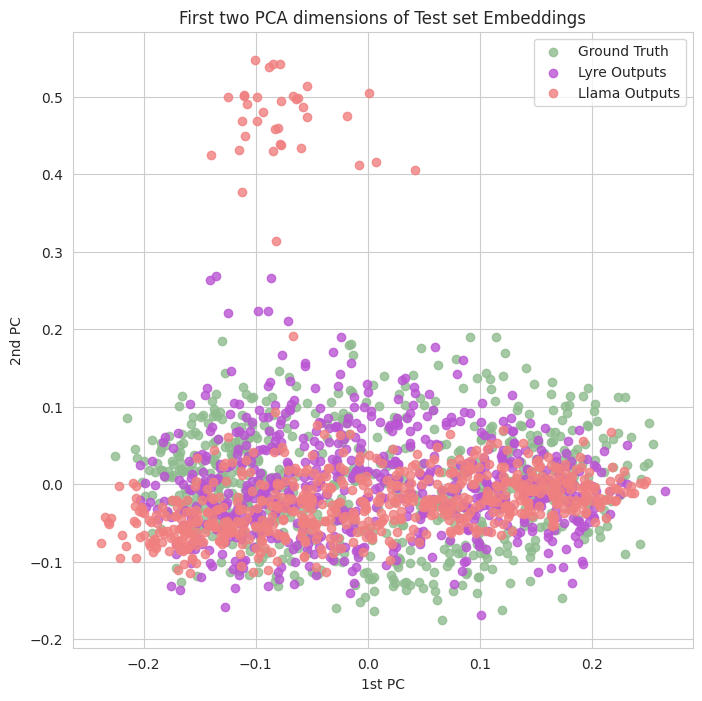

In [27]:

sns.set_style("whitegrid")
comp = PCA(n_components=2)
top1 = comp.fit_transform(truth)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
ax.scatter(top1[:, 0], top1[:, 1], color='darkseagreen', alpha=0.8, label="Ground Truth")

comp = PCA(n_components=2)
top2 = comp.fit_transform(lyre)
ax.scatter(top2[:, 0], top2[:, 1], color='mediumorchid', alpha=0.8, label="Lyre Outputs")

comp = PCA(n_components=2)
top3 = comp.fit_transform(llama)
ax.scatter(top3[:, 0], top3[:, 1], color='lightcoral', alpha=0.8, label="Llama Outputs")

ax.legend()
ax.set_title("First two PCA dimensions of Test set Embeddings")
ax.set_xlabel("1st PC")
ax.set_ylabel("2nd PC")

plt.show()